In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from pathlib import Path
import os

data_dir = Path().resolve() / 'data'

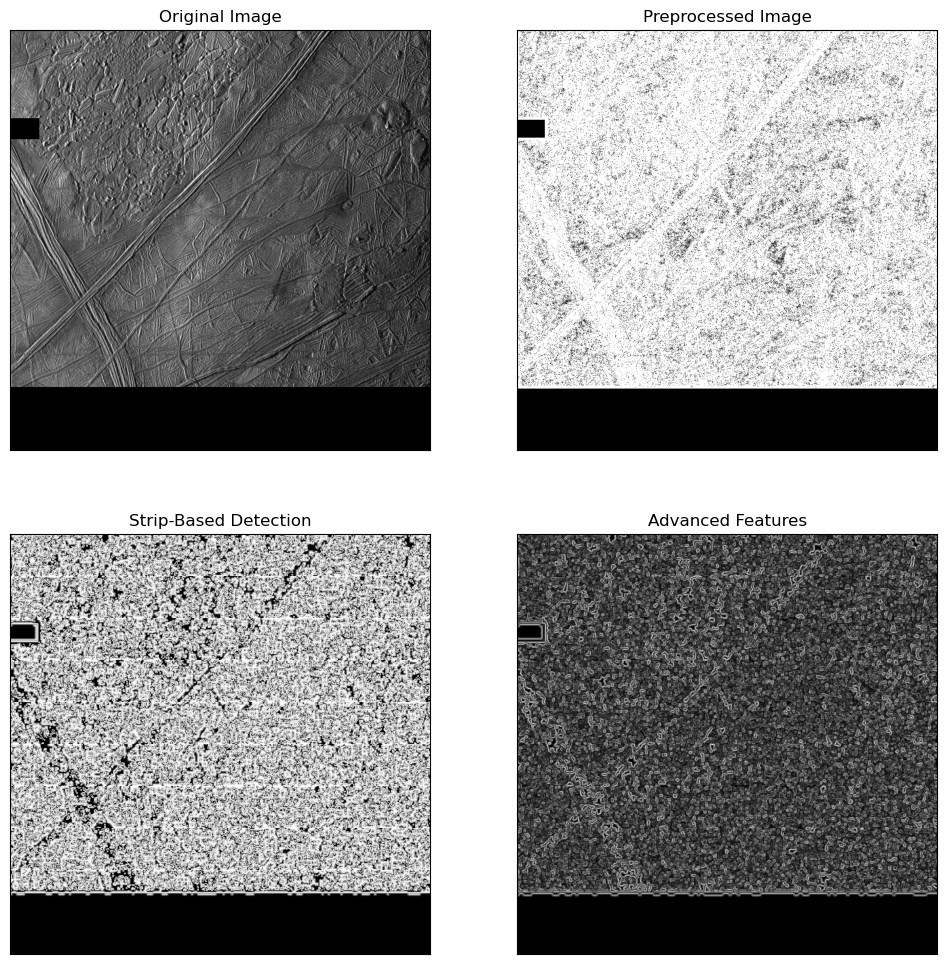

In [2]:
def preprocess_image(image):
    # Convert to grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Apply morphological operations
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv.dilate(gray, kernel, iterations=1)
    eroded = cv.erode(dilated, kernel, iterations=1)
    
    # Directional filtering (using Sobel filters)
    sobelx = cv.Sobel(eroded, cv.CV_64F, 1, 0, ksize=5)
    sobely = cv.Sobel(eroded, cv.CV_64F, 0, 1, ksize=5)
    directional_filtered = cv.magnitude(sobelx, sobely)
    
    # Local variance analysis
    local_variance = cv.Laplacian(directional_filtered, cv.CV_64F)
    
    return local_variance

def strip_based_detection(image):
    # Analyze selected strips of the image
    height, width = image.shape
    strip_height = height // 10  # Example strip height
    edges = np.zeros_like(image)
    
    for i in range(0, height, strip_height):
        strip = image[i:i+strip_height, :]
        # Multiscale detection within strips
        for scale in [1, 2, 4]:
            resized_strip = cv.resize(strip, (width // scale, strip_height // scale))
            edges_strip = cv.Canny(resized_strip, 100, 200)
            edges_strip = cv.resize(edges_strip, (width, strip_height))
            edges[i:i+strip_height, :] = np.maximum(edges[i:i+strip_height, :], edges_strip)
    
    return edges

def advanced_feature_detection(image):
    # Placeholder for Steger Algorithm (not implemented in OpenCV)
    # Apply local gradient intensity operations
    gradient_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=5)
    gradient_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = cv.magnitude(gradient_x, gradient_y)
    
    # Use quadratic polynomials to model curved segments
    # Placeholder for quadratic polynomial fitting
    
    return gradient_magnitude

orig_img = cv.imread(data_dir / 'C0383713713R_full.jpg')

# Pre-processing
preprocessed_img = preprocess_image(orig_img)

# Convert to 8-bit unsigned integer type
preprocessed_img = cv.convertScaleAbs(preprocessed_img)

# Strip-Based Detection
strip_edges = strip_based_detection(preprocessed_img)

# Advanced Feature Detection
advanced_features = advanced_feature_detection(strip_edges)

# Display the results
plt.figure(figsize=(12, 12))
plt.subplot(221), plt.imshow(cv.cvtColor(orig_img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(cv.cvtColor(preprocessed_img, cv.COLOR_BGR2RGB))
plt.title('Preprocessed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(strip_edges, cmap='gray')
plt.title('Strip-Based Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(advanced_features, cmap='gray')
plt.title('Advanced Features'), plt.xticks([]), plt.yticks([])

plt.show()

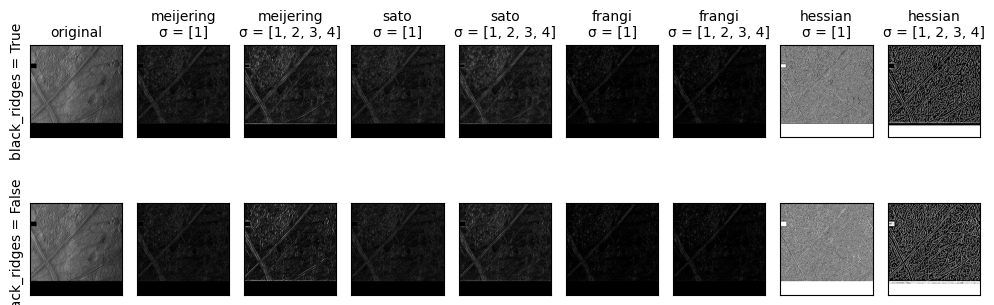

In [7]:
import cv2 as cv
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt


def original(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image


image = color.rgb2gray(cv.imread(data_dir / 'C0383713713R_full.jpg'))
cmap = plt.cm.gray

plt.rcParams["axes.titlesize"] = "medium"
axes = plt.figure(figsize=(10, 4)).subplots(2, 9)
for i, black_ridges in enumerate([True, False]):
    for j, (func, sigmas) in enumerate(
        [
            (original, None),
            (meijering, [1]),
            (meijering, range(1, 5)),
            (sato, [1]),
            (sato, range(1, 5)),
            (frangi, [1]),
            (frangi, range(1, 5)),
            (hessian, [1]),
            (hessian, range(1, 5)),
        ]
    ):
        result = func(image, black_ridges=black_ridges, sigmas=sigmas)
        axes[i, j].imshow(result, cmap=cmap)
        if i == 0:
            title = func.__name__
            if sigmas:
                title += f"\n\N{GREEK SMALL LETTER SIGMA} = {list(sigmas)}"
            axes[i, j].set_title(title)
        if j == 0:
            axes[i, j].set_ylabel(f'{black_ridges = }')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()